CASTRO SEBASTIAN - FEB2024 - PREENTREGA

Para el siguiente ejercicio se decidió levantar la base de ventas generadas por una financiera (comercializa créditos de consumo, tomando como punto de venta red de distintos comercios) en una ventana de tiempo de seis meses.
Por ejemplo, un cliente se presenta en un comercio como ser Victor Hogar, quiere comprar en cuotas un televisor y uno de los medios de financiación es mediante un crédito de consumo otorgado por esta financera.
Se generaron dos momentos distintos, de tres meses cada uno, a saber:

*   El primer grupo corresponde a las ventas generadas para los meses de Mayo, Junio y Julio de 2023; sobre los cuales tendremos las marcas de mora reales, explicadas más adelante en el objetivo.
*   El segundo grupo corresponde a las ventas generadas entre los meses de Agosto, Septiembre y OCtubre de 2023; sobre los cuales tendremos las marcas de mora reales analizadas a una ventana de tres meses, no pudiendo ver marcas de mora reales a una ventana de tiempo de seis meses cumplidos.

La base contiene un grupo de variables que son aportadas por los diferentes bureaus de créditos que consulta la financiera al momento de la evaluación, como ser Nosis, Siisa, Veraz, y sobre las cuales un motor de decisión, termina definidiendo una oferta (así como un rechazo) para cada cliente. Sobre esa oferta, el cliente puede tomar tanto el 100% como sólo una parte para financiar el producto que quiere comprar.

Por último, además de estas variables que forman parte de la admisión, se levantaron dos marcas de mora, bad30@3 y bad60@6:

*   Bad30@3: desde el momento de la venta, se observa hacia adelante a una ventana de 3 meses y vemos si en algún momento esa venta ha tocado los 30 días de mora, de cumplirse esa condición, se le asigna el resultado = 1 en dicho campo.
*   Bad60@6: desde el momento de la venta, se observa hacia adelante a una ventana de 6 meses y vemos si en algún momento esa venta ha tocado los 60 días de mora, de cumplirse esa condición, a la venta se le asigna el valor 1 en dicho campo.

Sobre estas variables es sobre las que apuntaremos la predicción mediante la aplicación de un modelo.



In [2]:
# Importamos las librerías que vamos a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
# Subimos la primera de las bases
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
ruta = '/content/gdrive/MyDrive/Colab Notebooks/CODERHOUSE - preentrega/Base1.xlsx'
Base1 = pd.read_excel(ruta)

# Agregamos una columna para indicar el origen de la base
Base1['origen'] = 'base1'

# Verificamos el tamaño de base1
print(Base1.shape)

Mounted at /content/gdrive
(15196, 26)


In [4]:
# Subimos la segunda de las bases
ruta2 = '/content/gdrive/MyDrive/Colab Notebooks/CODERHOUSE - preentrega/Base2.xlsx'
Base2 = pd.read_excel(ruta2)

# Agregamos una columna para indicar el origen de la base
Base2['origen'] = 'base2'

# Verificamos el tamaño de base2
print(Base2.shape)

(16189, 26)


In [5]:
# Unificamos las bases
base = pd.concat([Base1,Base2], axis = 0)

# Verificamos el tamaño de base
print(base.shape)

(31385, 26)


In [6]:
# Verificamos que, luego de la unión, no tenemos registros duplicados
base[base.duplicated(keep=False)]

,fechaevaluacion,numerocredito,pricing,cuil,edadcliente,capitalaprobado,capitalaceptado,relacioncapitalaprobadoaceptado,cuotaaprobada,cuotaaceptada,...,rci,aliado,rubro,diasprimervencimiento,cantidadcreditoscliente,poblacion,tipoEmpleoCalculado,fl_bad30,fl_bad60,origen


In [7]:
# Verificamos la cantidad de valores nulos que tenemos para cada una de las columnas
base.isnull().sum()

fechaevaluacion                     0
numerocredito                       0
pricing                             0
cuil                                0
edadcliente                        17
capitalaprobado                     0
capitalaceptado                     0
relacioncapitalaprobadoaceptado     0
cuotaaprobada                       0
cuotaaceptada                       0
relacioncuotaaprobadaaceptada       0
plazoaprobado                       0
plazoaceptado                       0
relacionplazoaprobadoaceptado       0
ingresocliente                      8
incomepredictorcliente              8
rci                                 8
aliado                              2
rubro                               0
diasprimervencimiento               3
cantidadcreditoscliente             0
poblacion                           0
tipoEmpleoCalculado                 0
fl_bad30                            0
fl_bad60                            0
origen                              0
dtype: int64

Si consideramos los registros que tienen al menos un valor de campo null, vemos que esa condición se da con los campos:

* edad: 17 registros nulos
* ingresocliente: 8 registros nulos
* incomepredicto: 8 registros nulos
* rci: 8 registros nulos
* aliado: 2 registros nulos
* diasprimervencimiento: 3 registros nulos

Considerando que los 8 registros referidos a faltante de info referida a ingresos son los mismos, en el peor de los casos tendremos 30 registros incompletos, de un total de 31385, representando un 0.09%. Se decide eliminar esos registros para quedarnos con la base sin registros nulos en todos sus campos.



In [8]:
# Eliminamos registros con al menos un valor nulo en uno de sus campos
base = base.dropna()
print(base.shape)

(31355, 26)


In [9]:
# Verificamos no tener valores nulos
print(base.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31355 entries, 0 to 16188
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fechaevaluacion                  31355 non-null  datetime64[ns]
 1   numerocredito                    31355 non-null  int64         
 2   pricing                          31355 non-null  object        
 3   cuil                             31355 non-null  int64         
 4   edadcliente                      31355 non-null  float64       
 5   capitalaprobado                  31355 non-null  float64       
 6   capitalaceptado                  31355 non-null  int64         
 7   relacioncapitalaprobadoaceptado  31355 non-null  float64       
 8   cuotaaprobada                    31355 non-null  float64       
 9   cuotaaceptada                    31355 non-null  int64         
 10  relacioncuotaaprobadaaceptada    31355 non-null  float64  

Con el fin de alivianar la base (aplicado sobre todo al tener muchos registros para así mejorar los tiempos de proceso), se decide eliminar la columna "cuil" que no aporta al análisis. De todas maneras contamos con el campo "numerocredito" que funciona como primary key.

In [10]:
base = base.drop(columns = 'cuil')

In [11]:
# Obtenemos un resumen, primera aproximación de los datos
print(round(base.describe()))

       numerocredito  edadcliente  capitalaprobado  capitalaceptado  \
count        31355.0      31355.0          31355.0          31355.0   
mean         95176.0         48.0         262124.0         146751.0   
std          12157.0         16.0         203657.0         129158.0   
min          74825.0         18.0          10836.0          10000.0   
25%          83930.0         35.0         136857.0          75498.0   
50%          95235.0         47.0         188714.0         111200.0   
75%         106124.0         60.0         332311.0         163840.0   
max         115787.0         84.0        2500000.0        1950000.0   

       relacioncapitalaprobadoaceptado  cuotaaprobada  cuotaaceptada  \
count                          31355.0        31355.0        31355.0   
mean                               1.0        66040.0        34392.0   
std                                0.0        64109.0        25103.0   
min                                0.0         3699.0         1804.0   


Observando estos datos, vemos que en "diasprimervencimiento" no deberíamos de tener valores negativos (posiblemente generados por aprobaciones fueras de plazo a modo de excepción, luego de cumplido el vto de la primera cuota).

In [12]:
# Creamos una variable para verificar cuántos valores negativos tenemos para el campo 'diasprimervencimiento'
filtrar = base['diasprimervencimiento'] <= 0
filtrados = base[filtrar]
print(filtrados.shape)

(1, 25)


Al tratarse de un sólo registro, se decide su eliminación

In [13]:
# Trabajando con el valor contrario, creamos un variable con todos los registros que sí deben quedar para redefinir el dataframe
permanencen = base['diasprimervencimiento'] > 0
base = base[permanencen]
print(base.shape)

(31354, 25)


In [14]:
# Volvemos a verificar utilizando 'describe()' para obervar que se hayan ido los valores negativos
print(round(base.describe()))

       numerocredito  edadcliente  capitalaprobado  capitalaceptado  \
count        31354.0      31354.0          31354.0          31354.0   
mean         95176.0         48.0         262114.0         146752.0   
std          12157.0         16.0         203651.0         129160.0   
min          74825.0         18.0          10836.0          10000.0   
25%          83929.0         35.0         136857.0          75497.0   
50%          95234.0         47.0         188710.0         111200.0   
75%         106125.0         60.0         332284.0         163845.0   
max         115787.0         84.0        2500000.0        1950000.0   

       relacioncapitalaprobadoaceptado  cuotaaprobada  cuotaaceptada  \
count                          31354.0        31354.0        31354.0   
mean                               1.0        66039.0        34392.0   
std                                0.0        64110.0        25104.0   
min                                0.0         3699.0         1804.0   


### **COMENZAMOS CON LOS GRÁFICOS PARA ANALIZAR LOS DATOS DEL DATAFRAME "BASE"**

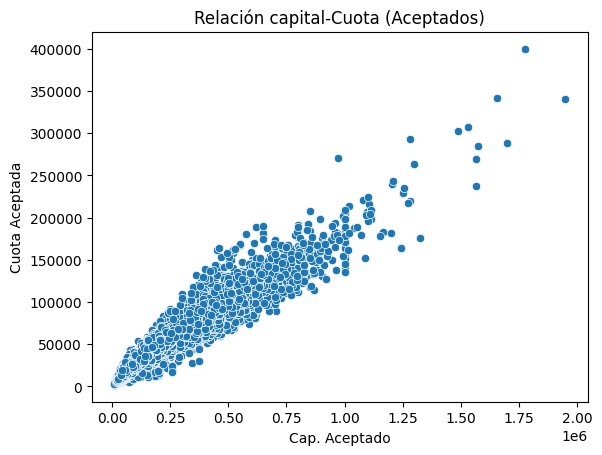

In [15]:
sns.scatterplot(data=base, x='capitalaceptado', y='cuotaaceptada')

# Agregamos títulos y nombre a los ejes
plt.title("Relación capital-Cuota (Aceptados)")
plt.xlabel("Cap. Aceptado")
plt.ylabel("Cuota Aceptada")

# Mostramos el gráfico
plt.show()

Vemos que existe una relación directa positiva entre el capital aceptado y el valor de cuota para cada una de las aprobaciones. Mientras más alto el capital, más alto el valor de cuota. Como estamos trabajando con información de seis de meses de ventas, repetimos el grráfico para un mes en particular para verificar que la relación se mantenga.

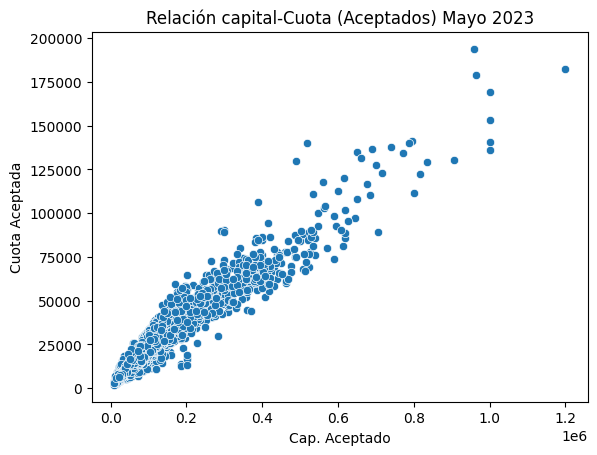

In [16]:
# Creamos un nuevo dataframe, filtrando sólo un mes de los seis que tiene la base
muestra = base[(base['fechaevaluacion'] >= '2023-05-01') & (base['fechaevaluacion'] <= '2023-05-31')]
# Para tratar de optimizar espacio de memoria utilizada, sólo nos quedamos con las columnas que vamos a graficar
muestra = muestra[['capitalaceptado','cuotaaceptada','incomepredictorcliente','ingresocliente']]

sns.scatterplot(data=muestra, x='capitalaceptado', y='cuotaaceptada')

plt.title("Relación capital-Cuota (Aceptados) Mayo 2023")
plt.xlabel("Cap. Aceptado")
plt.ylabel("Cuota Aceptada")

plt.show()

Respecto la construcción de los ingresos del cliente, cuando consultamos a los bureus (en este caso Veraz), nos devuelve un valor que llamamos "ip" (income predictor) que responde a una escala de ingresos, que toma valores entre 0 y 99, que luego en el proceso de admisión se reemplaza por un ingreso que corresponde a cada IP. Por lo tanto los ingresos no son una variable continua, sino que es del tipo categórica del tipo ordinal.

IMPORTANTE: el valor que se asigna a cada IP se va actualizando por inflación en un momento dado del mes que no siempre es el mismo.

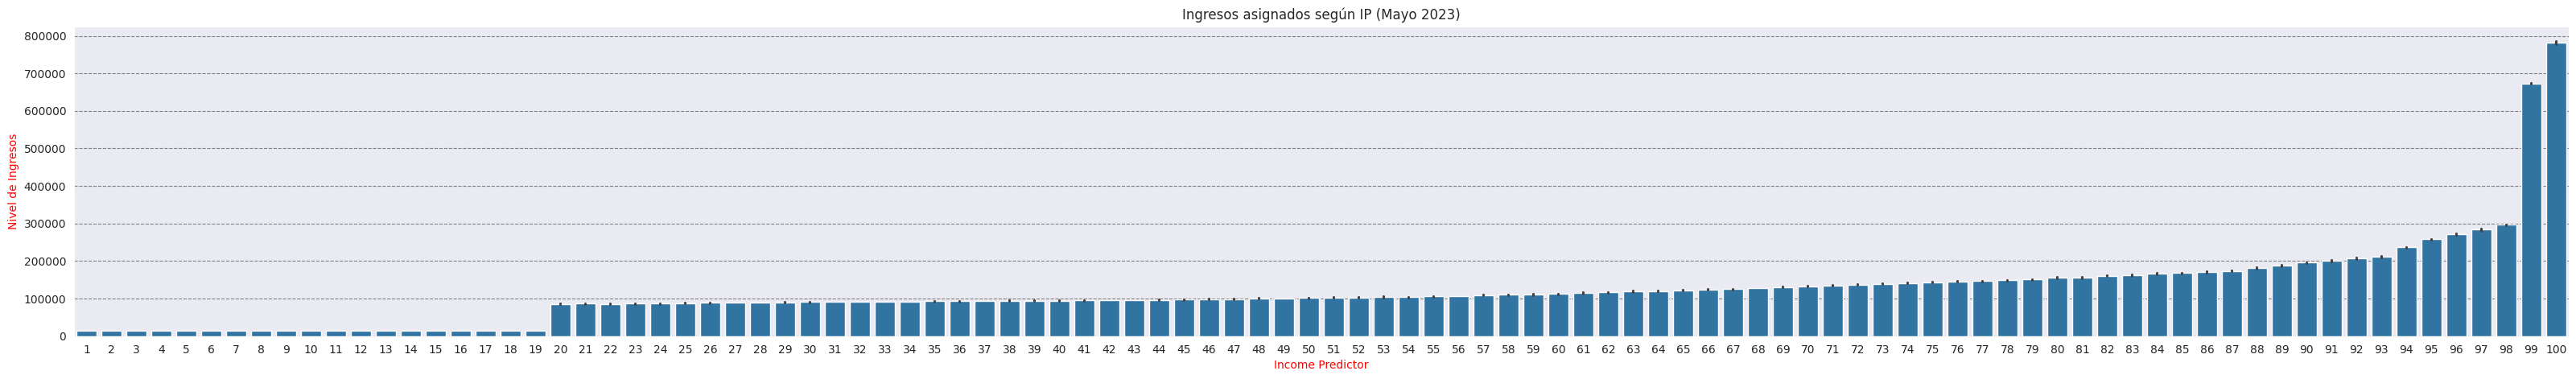

In [18]:
# Aplicamos formato a los gráficos
sns.set_style(style = 'darkgrid', rc = {'grid.color':'.4'})
sns.set_style(rc = {'grid.linestyle':':'})
sns.set_style(rc = {'axes.titleweight':'large'})
sns.set_style(rc = {'axes.titlelocation':'left'})
sns.set_style(rc = {'axes.titlecolor':'blue'})
sns.set_style(rc = {'axes.labelcolor':'red'})
sns.set_style(rc = {'axes.labelsize':'1'})
sns.set_style(rc = {'axes.labelweight':'small'})
sns.set_style(rc = {'axes.linewidth':'0.5'})
sns.set_style(rc = {'grid.color':'grey'})
sns.set_style(rc = {'grid.linestyle':'--'})
sns.set_style(rc = {'grid.linewidth':'0.5'})
sns.set_style(rc = {'font.fantasy':'Comic Sans MS'})
sns.set_style(rc = {'font.serif':'Utopia'})

fig, ax = plt.subplots(figsize=(40, 5))

# Convertimos las variables a formato int
muestra = muestra.astype(int)

# Utilizando la muestra armada del mes de Mayo 2023, se muestra la relación entre IP e ingresos correspondientes.
sns.barplot(x = 'incomepredictorcliente', y = 'ingresocliente', data = muestra)

plt.title('Ingresos asignados según IP (Mayo 2023)')
plt.xlabel('Income Predictor')
plt.ylabel('Nivel de Ingresos')

plt.show()

En el gráfico de barras podemos ver como para los primeros 19 valores de IP se mantienen constante un valor muy bajo; estos valores se reemplazan al momento de la evaluación por un valor de ingreso mínimo (SMVM). Por el contrario, para los dos mejores niveles de ip (99 y 100) se establecen valores muy elevados. Esto se debe a que veraz en casos excepcionales devuelve estos valores de ip ante la consulta de una persona. En estos casos los ingresos no serán una limitante para los produtos que se están evaluando.

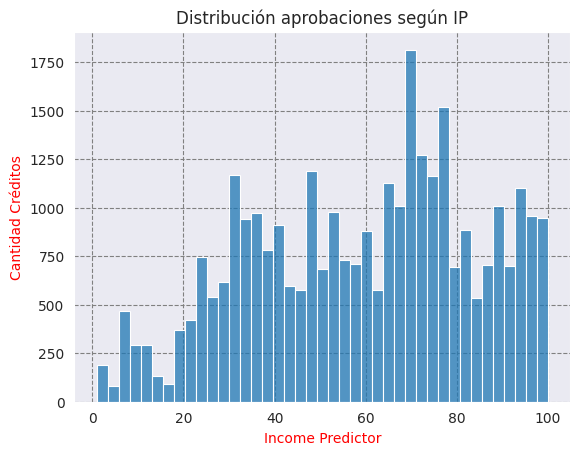

In [19]:
sns.set_style(rc = {'axes.titlecolor':'red'})

# Armamos un histograma con los distintos IP
sns.histplot(data = base, x = 'incomepredictorcliente')

plt.title('Distribución aprobaciones según IP')
plt.xlabel('Income Predictor')
plt.ylabel('Cantidad Créditos')

plt.show()

Podemos observar que la mayor concentración, si bien no responde a una distribución normal, la encontramos entre el ip 60 y el ip 80. Para verificar que el comportamiento de ip en el agrupado no tenga un sesgo por agrupar varios momentos distintos de tiempo, abrimos el gráfico para cada una de los meses con los que estamos trabajando.

In [20]:
# Agregamos una nueva columna que agrupe por periodo las aprobación de cada mes.
base['periodo'] = base['fechaevaluacion'].dt.strftime('%Y%m').astype(int)
print(base[['fechaevaluacion','periodo']].tail(1))

      fechaevaluacion  periodo
16188      2023-10-31   202310


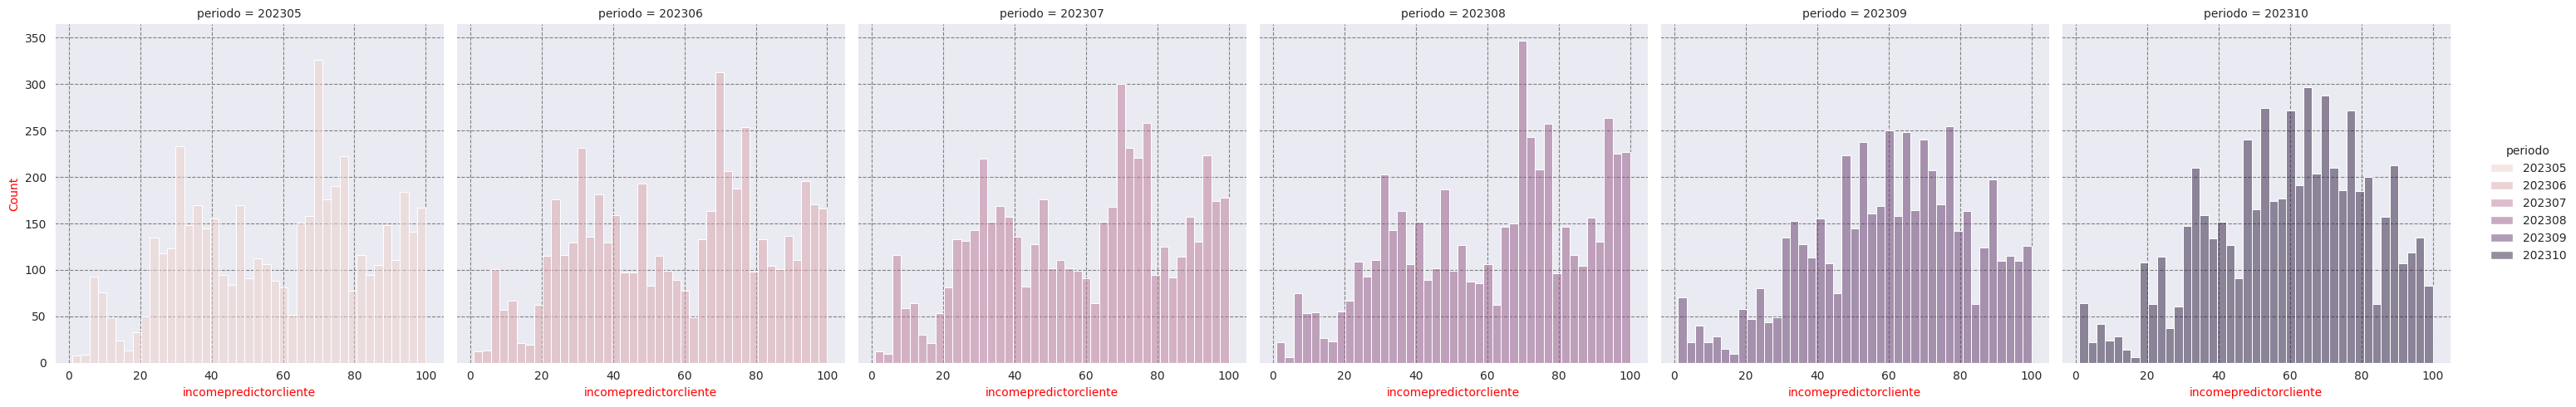

In [21]:
# Armamos el conjunto de gráficos donde compararemos periodos
sns.displot(data = base, x = 'incomepredictorcliente', hue = 'periodo', col = 'periodo')

Ahora, al realizar la apertura por los diferentes periodos, podemos observar como en los primeros meses teníamos pocas aprobaciones para ip = 60, seguido con un pico para los siguientes. A partir de Septiembre, comienza a tener una distribución más normal, transladándose la caída desde el ip 60 al 80. Como el ip es una variable que nos devuelve el bureau Veraz al momento de la consulta, un punto de consulta hacia ellos es ver si hicieron una recalibración que resulta en una nueva distribución de los ingresos de los clientes. Esto se supone porque desde la financiera no se realizaron modificaciones en los equivalente a los ingresos y no se aplicaron cambios en la política de admisión que admita más clientes con ip 60 y menos con ip 80.

# OBJETIVO DEL TRABAJO
## Se plantearon dos objetivos basados en la mora esperada para las nuevas ventas.


1.   Por un lado queremos tratar de predecir (con cierto grado de probabilidad) cuál será la mora esperada para las nuevas ventas (predecir la marca de mora Bad30@3) tomando como referencia la mora real (medida con el mismo indicador) para las ventas leventadas en la base.
2.   En segundo lugar, contamos con otra marca de mora real que se calcula a una ventana de tiempo mayor (Bad60@6) sólo para los tres primeros meses de la base, que corresponde al 50% de los datos aproximadamente. Tomando como referencia la relación entre la Bad30@3 y la Bad60@6 reales para los tres primeros meses, el desafío es estimar cuál sería la Bad60@6 para el resto de la base, es decir los últimos 6 meses. Conociendo esta relación, que por experiencia crediticia suele ser muy estable (siempre que la gestión de cobranzas de la entidad no sufra modificaciones de base, como ser cambiar la forma de gestionar las cuentas en mora) a las nuevas ventas, además de poder estimar la Bad30@3 esperada, trataremos de estimar cuál será su posterior Bad60@6.



In [23]:
print(base.head(5))

  fechaevaluacion  numerocredito pricing  edadcliente  capitalaprobado  \
0      2023-05-01          74825       E         36.0        135819.66   
1      2023-05-02          74826       E         40.0         82609.19   
2      2023-05-02          74827       E         34.0        140000.00   
3      2023-05-02          74828       F         43.0        112000.00   
4      2023-05-02          74829       E         52.0        121157.64   

   capitalaceptado  relacioncapitalaprobadoaceptado  cuotaaprobada  \
0            79000                           0.5817       33040.02   
1            40000                           0.4842       20440.79   
2           133718                           0.9551       30489.60   
3           112000                           1.0000       28228.20   
4           116000                           0.9574       29473.28   

   cuotaaceptada  relacioncuotaaprobadaaceptada  ...            aliado  \
0          24612                         0.7449  ...  MUEBLE

In [24]:
# Creamos una tabla auxiliar para agrupar cuántos clientes fueron marcados como morosos (bad30@3 = 1) y su relación sobre el total de casos para cada agrupación según variables categóricas y periodo
badpoblacion = base.groupby(['periodo','poblacion']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badpoblacion['%bad'] = badpoblacion['fl_bad30']/badpoblacion['numerocredito']
badpoblacion = badpoblacion.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})
print(badpoblacion)

                   CasosBad  CasosTotal      %bad
periodo poblacion                                
202305  HIT             432        4327  0.099838
        THIN             70         502  0.139442
202306  HIT             477        4632  0.102979
        THIN             61         466  0.130901
202307  HIT             490        4790  0.102296
        THIN             57         470  0.121277
202308  HIT             527        4807  0.109632
        THIN             67         415  0.161446
202309  HIT             496        4722  0.105040
        THIN             48         408  0.117647
202310  HIT             516        5343  0.096575
        THIN             60         472  0.127119


In [25]:
# Creamos una tabla auxiliar para agrupar cuántos clientes fueron marcados como morosos (bad30@3 = 1) y su relación sobre el total de casos para cada agrupación según variables categóricas y periodo
badpricing = base.groupby(['periodo','pricing']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badpricing['%bad'] = badpricing['fl_bad30']/badpricing['numerocredito']
badpricing = badpricing.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})
print(badpricing)

                 CasosBad  CasosTotal      %bad
periodo pricing                                
202305  A              14         376  0.037234
        B              31         516  0.060078
        C              74         824  0.089806
        D              60         638  0.094044
        E             208        1678  0.123957
        F             115         797  0.144291
202306  A              18         414  0.043478
        B              40         590  0.067797
        C              64         866  0.073903
        D              68         711  0.095640
        E             235        1678  0.140048
        F             113         839  0.134684
202307  A              25         511  0.048924
        B              33         623  0.052970
        C              92         893  0.103024
        D              64         698  0.091691
        E             227        1717  0.132207
        F             106         818  0.129584
202308  A              29         538  0

In [26]:
# Creamos una tabla auxiliar para agrupar cuántos clientes fueron marcados como morosos (bad30@3 = 1) y su relación sobre el total de casos para cada agrupación según variables categóricas y periodo
badempleo = base.groupby(['periodo','tipoEmpleoCalculado']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badempleo['%bad'] = badempleo['fl_bad30']/badempleo['numerocredito']
badempleo = badempleo.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})
print(badempleo)

                             CasosBad  CasosTotal      %bad
periodo tipoEmpleoCalculado                                
202305  Estatal                    60         582  0.103093
        Independiente              36         390  0.092308
        Informal                  227        2013  0.112767
        Jubilado                   86         937  0.091782
        Rel. de dep.               93         907  0.102536
202306  Estatal                    55         602  0.091362
        Independiente              40         368  0.108696
        Informal                  245        2227  0.110013
        Jubilado                   87        1010  0.086139
        Rel. de dep.              111         891  0.124579
202307  Estatal                    57         562  0.101423
        Independiente              39         423  0.092199
        Informal                  237        2223  0.106613
        Jubilado                  103        1011  0.101879
        Rel. de dep.              111   

In [27]:
# Eliminamos el tipo de empleo "Sin empleo" por tener muy pocos valores en tabla badempleo
badempleo = badempleo.query('tipoEmpleoCalculado != "Sin empleo"')
# Al tratarse de un total de 7 registros en la base, también eliminamos este dato de la base general
base = base.query('tipoEmpleoCalculado != "Sin empleo"')

In [28]:
# Creamos una tabla auxiliar para agrupar cuántos clientes fueron marcados como morosos (bad30@3 = 1) y su relación sobre el total de casos para cada agrupación según variables categóricas y periodo
badrubro = base.groupby(['periodo','rubro']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badrubro['%bad'] = badrubro['fl_bad30']/badrubro['numerocredito']
badrubro = badrubro.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})
print(badrubro)

                      CasosBad  CasosTotal      %bad
periodo rubro                                       
202305  CELULAR             19         190  0.100000
        EFECTIVO           106         991  0.106963
        ELECTRO            313        3054  0.102489
        INDUMENTARIA        12          78  0.153846
        MOTO                44         443  0.099323
        OTROS                8          73  0.109589
202306  CELULAR             18         220  0.081818
        EFECTIVO            85         799  0.106383
        ELECTRO            371        3549  0.104536
        INDUMENTARIA         8          75  0.106667
        MOTO                42         388  0.108247
        OTROS               14          67  0.208955
202307  CELULAR             40         347  0.115274
        EFECTIVO            95         782  0.121483
        ELECTRO            344        3486  0.098680
        INDUMENTARIA        16          90  0.177778
        MOTO                44         474  0.

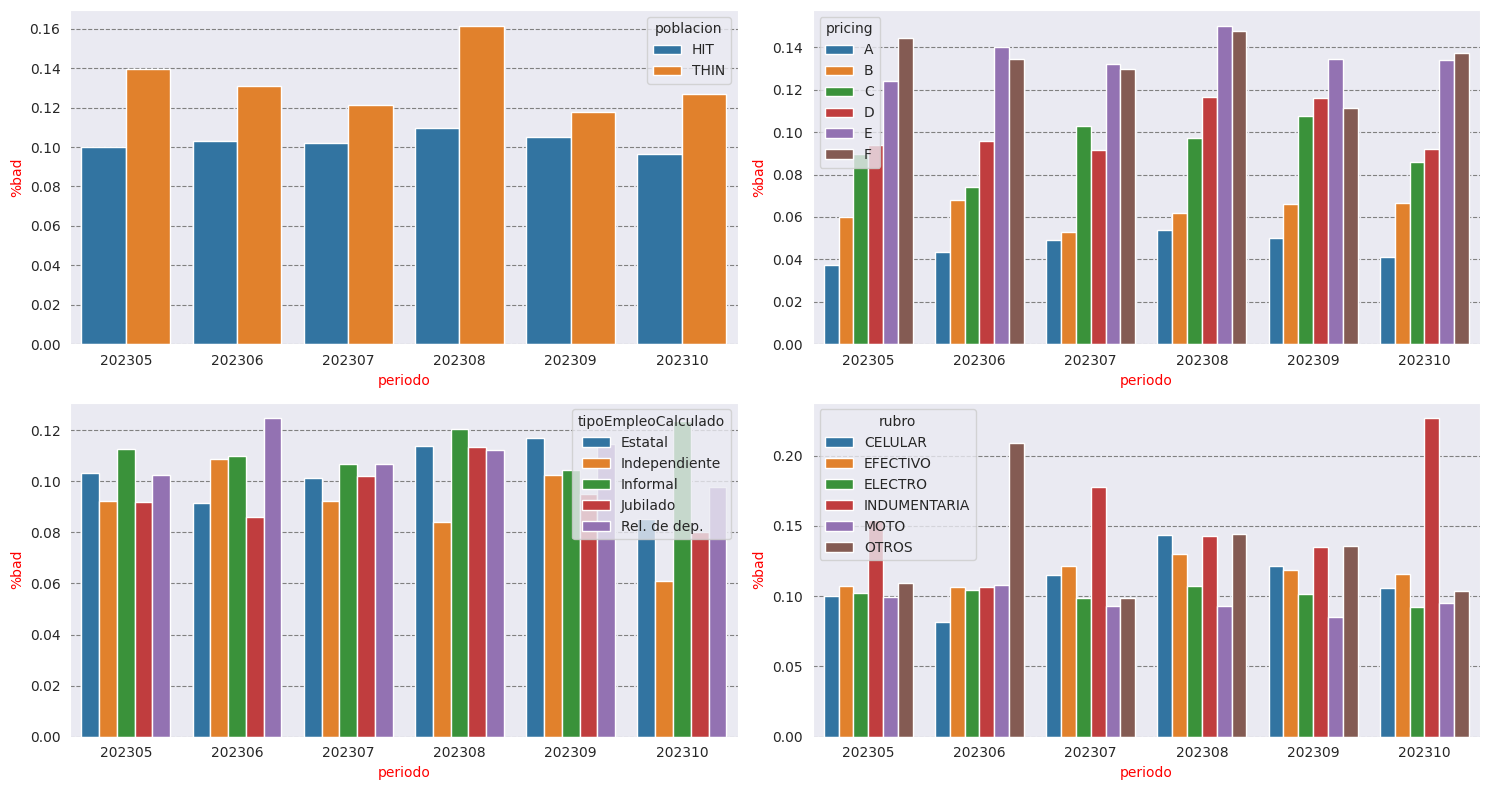

In [29]:
# Graficamos las relaciones de cliente morosos y no morosos sobre el total de casos para cada categoría, abierdo para cada periodo
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Crear scatterplots en cada subtrama
sns.barplot(x = 'periodo', y = '%bad', data = badpoblacion, hue = 'poblacion', ax = axes[0,0])
sns.barplot(x = 'periodo', y = '%bad', data = badpricing, hue = 'pricing', ax = axes[0,1])
sns.barplot(x = 'periodo', y = '%bad', data = badempleo, hue = 'tipoEmpleoCalculado', ax = axes[1,0])
sns.barplot(x = 'periodo', y = '%bad', data = badrubro, hue = 'rubro', ax = axes[1,1])

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# quise quitar la leyenda por fuera del gráfica para cada caso, pero no pude realizarlo, probando con:
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0)

plt.show()

En los gráficos de arriba se puede observar como las variables discriminan:

*   Población: los cliente THIN (aquellos que no tienen antecedente crediticio registrado en BCRA así como en los distintos bureaus) tienen mayor mora que los cliente HIT (con historia crediticia).
*   Pricing: el pricing es una categoría que se asigna al cliente al momento de la evaluación según combinaciones de distintas variables, el segmento A corresponde al mejor segmento de cliente y ordena de forma decreciente, siendo el segmento F quien peor debería comportarse (tener más mora). En el gráfico se observa como la mayor relación de mora se concentra en los peores segmentos.
*   Empleo: el empleo no es una variable categórica ordinal. A grandes rasgos para cada uno de los periodos, se observa que el tipo de empleo "Independiente" es aquel que mejor comportamiento de pago presenta, siendo el segmento "Informal" quien por el contrario, peor mora presenta.
*   Rubro: tampoco es una variable ordinal. Se puede observar para todos los períodos que el rubro "indumentaria" tiene un mal comportamiento (aunque genera poco volúmen de ventas, se observa en la vista de la tabla badrubro). Los segmentos "electro", "moto" y "efectivo" (efectivo son aquellos que se llevan dinero para libre disponibilidad) son los que más volúmen concentran y tienen un comportamiento similar.





In [113]:
# Vamos a volver a generar la misma información de relación de Bad30@3 según variables, pero esta vez agrupando todos los periodos
badpoblacionagrup = base.groupby(['poblacion']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badpoblacionagrup['%bad'] = badpoblacionagrup['fl_bad30']/badpoblacionagrup['numerocredito']
badpoblacionagrup = badpoblacionagrup.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})

badpricingagrup = base.groupby(['pricing']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badpricingagrup['%bad'] = badpricingagrup['fl_bad30']/badpricingagrup['numerocredito']
badpricingagrup = badpricingagrup.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})

badempleoagrup = base.groupby(['tipoEmpleoCalculado']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badempleoagrup['%bad'] = badempleoagrup['fl_bad30']/badempleoagrup['numerocredito']
badempleoagrup = badempleoagrup.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})

badrubroagrup = base.groupby(['rubro']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badrubroagrup['%bad'] = badrubroagrup['fl_bad30']/badrubroagrup['numerocredito']
badrubroagrup = badrubroagrup.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})

badedadagrup = base.groupby(['edadcliente']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badedadagrup['%bad'] = badedadagrup['fl_bad30']/badedadagrup['numerocredito']
badedadagrup = badedadagrup.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})

badipagrup = base.groupby(['incomepredictorcliente']).aggregate({'fl_bad30':'sum','numerocredito':'count'})
badipagrup['%bad'] = badipagrup['fl_bad30']/badipagrup['numerocredito']
badipagrup = badipagrup.rename(columns = {'fl_bad30':'CasosBad','numerocredito':'CasosTotal'})

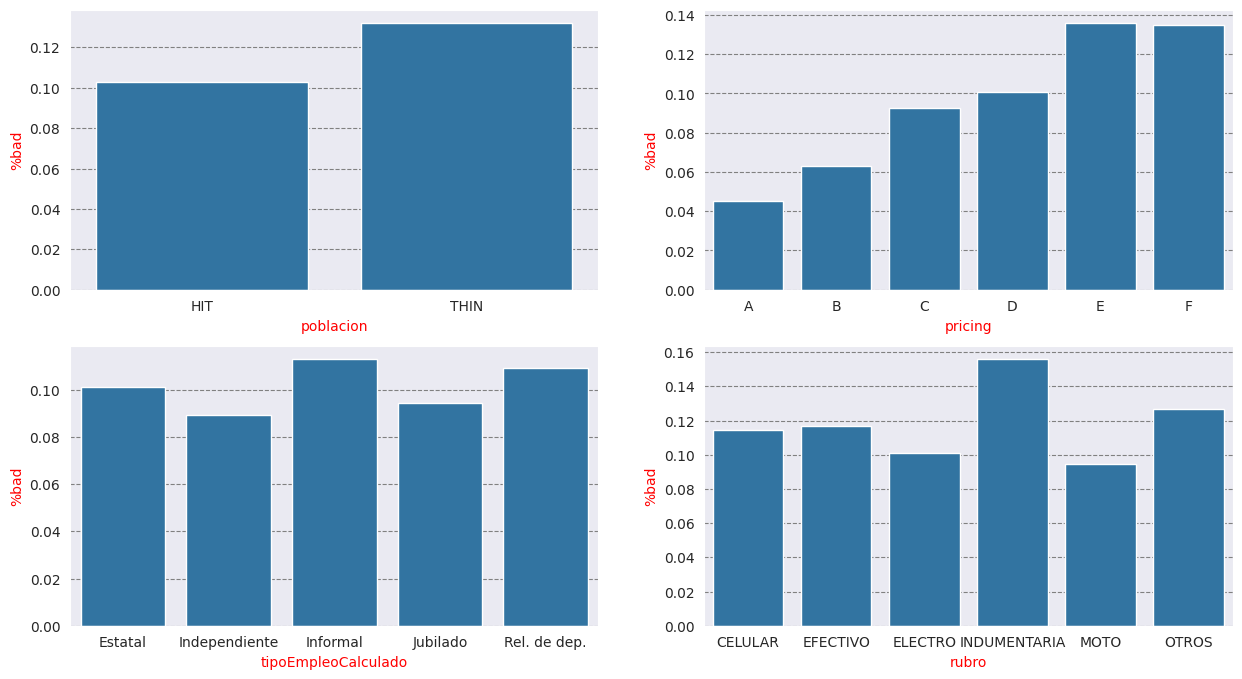

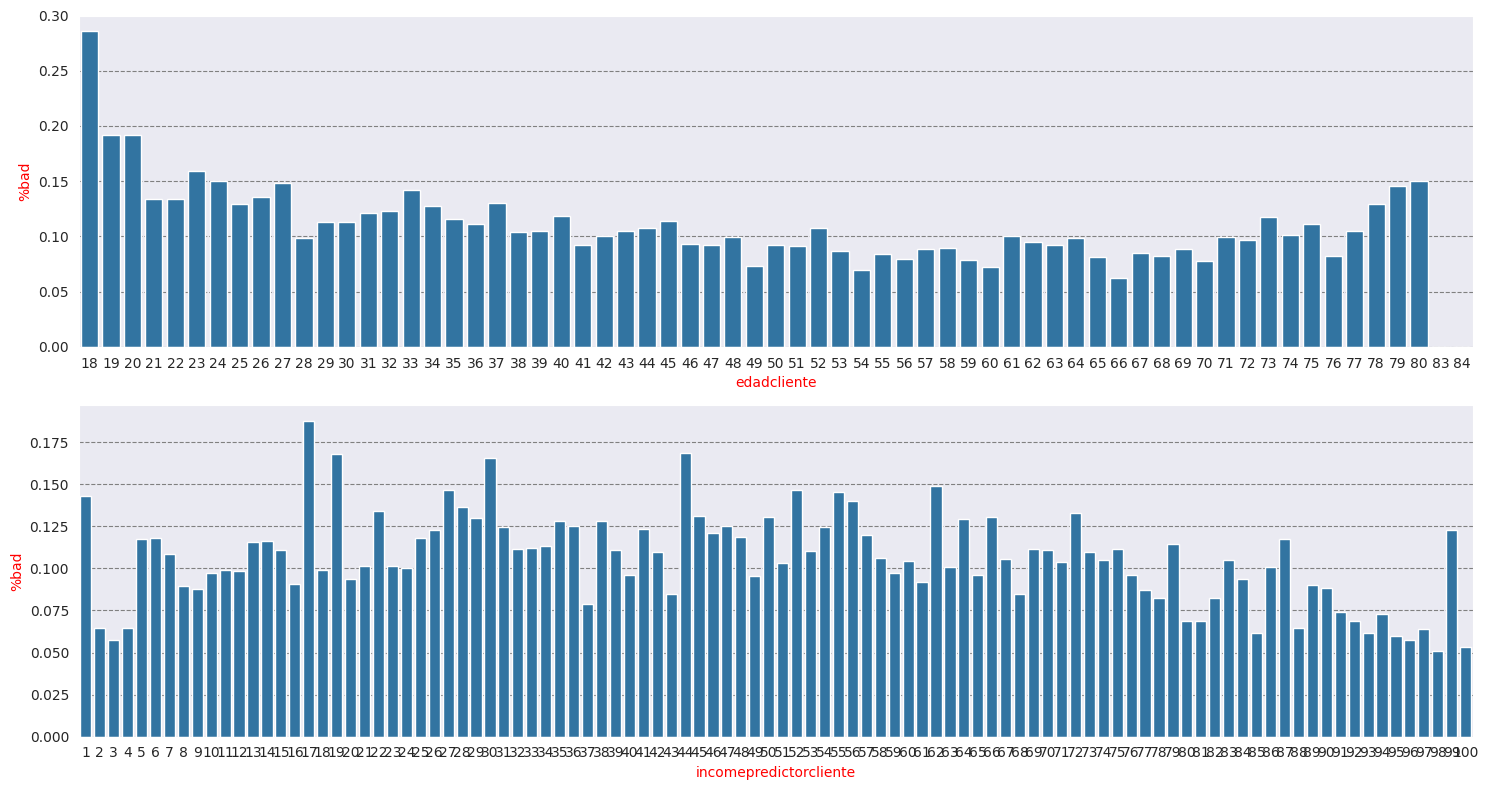

In [114]:
# Graficamos las seis tablas creadas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

sns.barplot(x = 'poblacion', y = '%bad', data = badpoblacionagrup, ax = axes[0,0])
sns.barplot(x = 'pricing', y = '%bad', data = badpricingagrup, ax = axes[0,1])
sns.barplot(x = 'tipoEmpleoCalculado', y = '%bad', data = badempleoagrup, ax = axes[1,0])
sns.barplot(x = 'rubro', y = '%bad', data = badrubroagrup, ax = axes[1,1])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

badedadagrup.reset_index(inplace = True)
badedadagrup['edadcliente'] = badedadagrup['edadcliente'].astype(int)
sns.barplot(x = 'edadcliente', y = '%bad', data = badedadagrup, ax = axes[0])
badipagrup.reset_index(inplace = True)
badipagrup['incomepredictorcliente'] = badipagrup['incomepredictorcliente'].astype(int)
sns.barplot(x = 'incomepredictorcliente', y = '%bad', data = badipagrup, ax = axes[1])

plt.tight_layout()

plt.show()

Podemos observar que los cuatro primeros gráficos, que ahora agrupan a todos los periodos, ordenan de la misma manera.
Respuesto las dos nuevas agrupaciones:
*   Edad: se observa que el comportamiento de mora se mantiene regular salgo para los clientes más jóvenes que tienen peor comportamiento y apenas ingresamos a edad jubilatoria vemos los mejores comportamiento (60 y 65 años).
*   Income predictor: podemos afirmar que el nivel de ingresos presuntos (income predictor que otorga el bureau) no ordena la mora. Los valores más altos de %bad30@3 están muy repartidos.



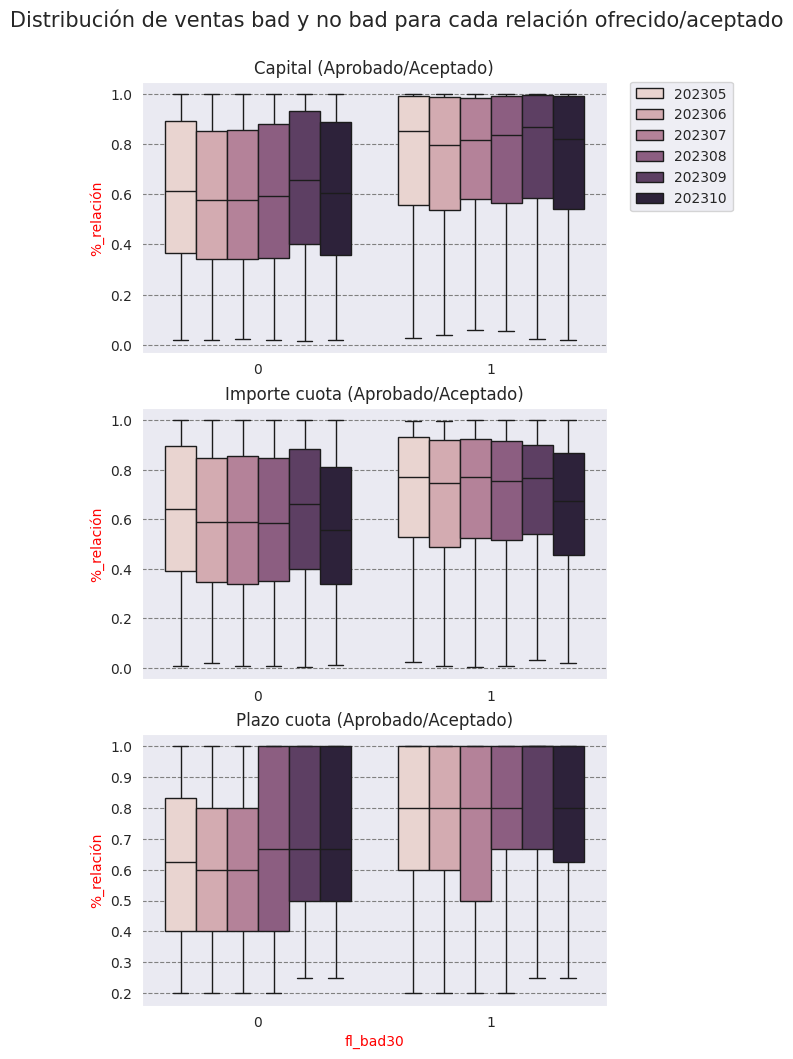

In [97]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))

sns.boxplot(x = 'fl_bad30', y = 'relacioncapitalaprobadoaceptado', hue = 'periodo', legend = False, data = base, ax = axes[0])
sns.boxplot(x = 'fl_bad30', y = 'relacioncuotaaprobadaaceptada', hue = 'periodo', legend = False, data = base, ax = axes[1])
sns.boxplot(x = 'fl_bad30', y = 'relacionplazoaprobadoaceptado', hue = 'periodo', data = base, ax = axes[2])

plt.legend(bbox_to_anchor = (1.05, 3.4), loc = 'upper left', borderaxespad = 0)

axes[0].set_title('Capital (Aprobado/Aceptado)')
axes[0].set(xlabel=None)
axes[0].set(ylabel='%_relación')
axes[1].set_title('Importe cuota (Aprobado/Aceptado)')
axes[1].set(xlabel=None)
axes[1].set(ylabel='%_relación')
axes[2].set_title('Plazo cuota (Aprobado/Aceptado)')
axes[2].set(ylabel='%_relación')
fig.suptitle('Distribución de ventas bad y no bad para cada relación ofrecido/aceptado', x = 0.55, y = 0.94, fontsize = 15)

plt.show()

Por último, si observamos la distribución de morosos y no morosos para cada una de las relaciones, se obtienen las siguientes conclusiones:
*   El comportamiento es similar para todos los períodos, esto es esperable porque las relaciones se basan en las decisiones de los clientes posteriores a que son aprobados y se les hace una oferta, sea cual sea el resultado de su evaluación y como se clasificaron.
*   Los clientes que llegan a cumplir la marca de mora analizada, en otras palabras aquellos que tienen mal comportamiento, tienden a llevarse lo más posible, sea a nivel capital ofrecido como cantidad de cuotas. Este punto se basa en la premisa se riesgos que aquellos que solicitan un crédito con intención de no abonarlo, suelen "llevarse" lo más que pueden.
*   la relación del importe de cuota ofrecido sobre el aceptado tiene el mismo comportamiento, pero con menor intensidad que el resto de las relaciones.

Como estas relaciones terminan siendo variables ordinales, podríamos omitir para cada una de las tres tanto el aceptado como el ofrecido, porque el % ya contiene a ambas.
Por el momento se dejan todas las variables, pero de ser necesario se podría optar por eliminar las columnas, capitalaceptado, cuotaaceptada, plazoaceptado.





## Como parte del proceso de Data Discretization, trabajamos sobre las variables categóricas

### Remplazamos las categorías por valores numéricos, utilizando la técnica de One Hot Encoding
Se decide utilizar esta discretización para las variables de "rubro", "empleo", "población", "pricing". A la variable Aliado (que contiene la información del comercio donde el cliente realizó la compra) al tener tantas posibilidades, seguramente no discrimine dentro del ejercicio, por el momento se deja en la base sin tratamiento, posiblemente se decida su eliminación.

In [31]:
# Aplicamos One Hot Encoding a cada una de las variables, trabajándolas de a una
base_encoded = pd.get_dummies(base, columns = ['poblacion'])
base_encoded = pd.get_dummies(base_encoded, columns = ['pricing'])
base_encoded = pd.get_dummies(base_encoded, columns = ['tipoEmpleoCalculado'])
base_encoded = pd.get_dummies(base_encoded, columns = ['rubro'])

# Verificamos la creación de las variables dummies
print(base_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31347 entries, 0 to 16188
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   fechaevaluacion                    31347 non-null  datetime64[ns]
 1   numerocredito                      31347 non-null  int64         
 2   edadcliente                        31347 non-null  float64       
 3   capitalaprobado                    31347 non-null  float64       
 4   capitalaceptado                    31347 non-null  int64         
 5   relacioncapitalaprobadoaceptado    31347 non-null  float64       
 6   cuotaaprobada                      31347 non-null  float64       
 7   cuotaaceptada                      31347 non-null  int64         
 8   relacioncuotaaprobadaaceptada      31347 non-null  float64       
 9   plazoaprobado                      31347 non-null  int64         
 10  plazoaceptado                     

In [32]:
# Verificamos que las variables creadas tengan la marca = 1 sólamente en una de las categorías (como el proceso es automático, no deberíamos de tener inconvenientes)
print(base_encoded[['poblacion_HIT','poblacion_THIN','pricing_A','pricing_B','pricing_C','pricing_D','pricing_E','pricing_F','tipoEmpleoCalculado_Estatal',
                    'tipoEmpleoCalculado_Independiente','tipoEmpleoCalculado_Informal','tipoEmpleoCalculado_Jubilado','tipoEmpleoCalculado_Rel. de dep.',
                    'rubro_CELULAR','rubro_EFECTIVO','rubro_ELECTRO','rubro_INDUMENTARIA','rubro_MOTO','rubro_OTROS']].head(7))

   poblacion_HIT  poblacion_THIN  pricing_A  pricing_B  pricing_C  pricing_D  \
0              1               0          0          0          0          0   
1              1               0          0          0          0          0   
2              0               1          0          0          0          0   
3              1               0          0          0          0          0   
4              0               1          0          0          0          0   
5              0               1          0          0          0          0   
6              1               0          0          1          0          0   

   pricing_E  pricing_F  tipoEmpleoCalculado_Estatal  \
0          1          0                            0   
1          1          0                            0   
2          1          0                            0   
3          0          1                            0   
4          1          0                            0   
5          1          0

In [129]:
# Acomodamos los nombre de tipoEmpleoCalculado
base_encoded = base_encoded.rename(columns = {'tipoEmpleoCalculado_Estatal':'empleo_ESTATAL','tipoEmpleoCalculado_Independiente':'empleo_INDEPENDIENTE',
                                              'tipoEmpleoCalculado_Informal':'empleo_INFORMAL','tipoEmpleoCalculado_Jubilado':'empleo_JUBILADO',
                                              'tipoEmpleoCalculado_Rel. de dep.':'empleo_RELDEPENDENCIA'})

print(base_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31347 entries, 0 to 16188
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fechaevaluacion                  31347 non-null  datetime64[ns]
 1   numerocredito                    31347 non-null  int64         
 2   edadcliente                      31347 non-null  float64       
 3   capitalaprobado                  31347 non-null  float64       
 4   capitalaceptado                  31347 non-null  int64         
 5   relacioncapitalaprobadoaceptado  31347 non-null  float64       
 6   cuotaaprobada                    31347 non-null  float64       
 7   cuotaaceptada                    31347 non-null  int64         
 8   relacioncuotaaprobadaaceptada    31347 non-null  float64       
 9   plazoaprobado                    31347 non-null  int64         
 10  plazoaceptado                    31347 non-null  int64    

# A partir de esta instancia se comenzará a trabajar en el modelo para precedir las variables de mora desarrolladas en el objetivo ...